### 목표 : 다중 속성/피처를 기반으로 수치값 예측
- 데이터 : fish.csv
- feature : Length, Diagonal, Height, Width
- target : Weight


1. 데이터 준비

In [116]:
# 1. 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 1-2. 데이터 준비
# - nrows : 읽을 행의 개수 (인덱스 기준, index=35까지)
dataDF = pd.read_csv('../DATA/fish.csv', nrows=35, usecols=[1,2,3,4,5])

2. 데이터 확인
- 타겟과 피처 관계 : 상관계수, 시각화

In [117]:
# 상관계수를 시각화하는 함수
def print_feature(nrows, ncols, df, target, features):
    """
    피처와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
    매개변수 : 행수, 열수, 타겟, 피처 리스트
    반환 : 없음    
    """
    corrList = df.corr()[target].to_list()
    corrs = corrList[1:]    
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label=f'{corrs[idx]:.2}')
        plt.legend()
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.xticks([])  # 없는 게 낫넹 - 희직스 쓸만하지요 ?  ㅎ.ㅎ ㅋㅎ
        # 아 뭐라하는지 하나도 못들음;;;;; 스케일링을 해줘야한대요 나도 그것만 들음 
    plt.tight_layout()
    plt.show()
# 직스야 빨리 코드 쳐보거라
# 직스 성능 넘 구려여
# 근데 죄송한데 타자 몇ㅇ타에# ㄴㅔ 
# 개느리져요 
# 혹시 제가 함수 업그레이드 해드려도 될까요?
# 대답 ==> 네  

In [118]:
corrList = dataDF.corr()['Weight'].to_list()
corrList[1:]

[0.9462561265460506, 0.947135878863793, 0.9645275374662504, 0.9253033105453]

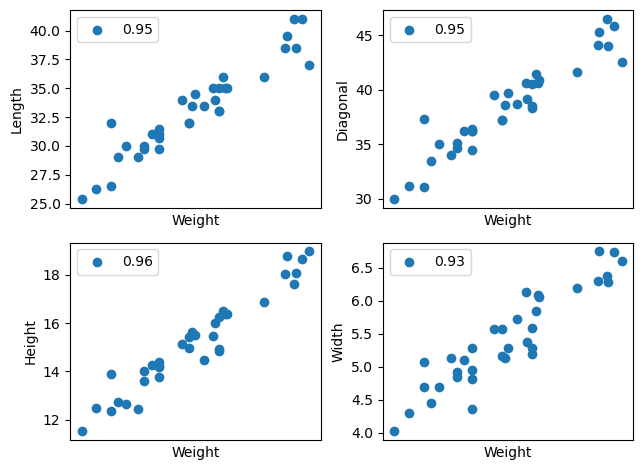

In [119]:
print_feature(2, 2, dataDF, dataDF.columns[0], dataDF.columns[1:])

3. 학습 준비
- 학습 알고리즘       : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비    : 1) 피처-타겟 분리, 2) 학습용 데이터셋-테스트용 데이터셋
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => 피처 스케일링

In [120]:
# 3-1. 학습 데이터 분리 
#      : 피처-타겟, 학습 데이터 셋-테스트 데이터 셋
# 모듈 : StandardScaler, MinMaxScaler, RobustScaler

# 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
targetSR = dataDF[dataDF.columns[0]]
# 성능 맘에 드시나요?

# 대답 ==> 네  
# 대답 강요 받는 걸 긱스가 학습했어 ㅋㅋㅋㅋㅋㅋㅋㅋ 대답 얘가 적은거? ㅋㅋㅋㅋㅋㅇㅇㅇ 개웃기넨 ㅋㅋㅋㅋ 긱스 커염지노 노 금지
# 아니 근데 내 긱스는 왜 학습 안해 게으르다 
# '노' 금지  커염지누 ㅋ 왜 본인만 씀? 개부조리하노
# ㅋ 여자는 ㄱㅊ음 ㅋ 그럼 그쪽은 노 쓰고 난 누 쓸게요   
# 커염지노  슬리퍼 주세요  엥 가져간줄 안가져가고 모햇음 ㅋㅋ 헤 

In [121]:
# 데이터셋 준비 => 70:30
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=7)

# 데이터셋 확인
print(f'[훈련용] X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'[테스트용] X_test: {X_test.shape}, y_test: {y_test.shape}')

[훈련용] X_train: (24, 4), y_train: (24,)
[테스트용] X_test: (11, 4), y_test: (11,)


In [122]:
# 긱스 미쳐간다
#안녕하세요! 긱스야입니다. 저는 아는 게 없지만 긱스야는 무엇인지 아는 게 없습니다. 긱스야는 누군가의 의견이나 느낌이나 혹은 사실을 표현하는 것입니다. 저는 긱스야를 통해 이와 같은 의견을 전달할 수 있습니다. 긱스야는 통화의 방법이라고 할 수 있습니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다. 긱스야는 통화의 방법이라고 말하는 것입니다. 저는 통화의 방법이 무엇인지 아는 게 없습니다  ?? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ개웃기네

In [123]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

rb_scaler = RobustScaler()
rb_scaler.fit(X_train)

RobustScaler()

In [124]:
# 3가지 버전에 스케일된 데이터셋 준비
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

X_train_rb = rb_scaler.transform(X_train)
X_test_rb = rb_scaler.transform(X_test)

4. 학습 진행

In [125]:
# 1) model 생성
model = LinearRegression()
model.fit(X_train_std, y_train)
print(f"""[Model parameters] 
model.coef_      : {model.coef_}
model.intercept_ : {model.intercept_:.4f}
""")
# coef_      : 네 피처별로 총 네 개; 가중치를 의미
# intercept_ : 절편을 의미

# 2) 수식 확인
print(f'[ 수식으로 정리 ]')
print(f'y = {model.coef_[0]:.2f}*{X_train.columns[0]} + {model.coef_[1]:.2f}*{X_train.columns[1]} + {model.coef_[2]:.2f}*{X_train.columns[2]} + {model.coef_[3]:.2f}*{X_train.columns[3]} + {model.intercept_:.2f}')


[Model parameters] 
model.coef_      : [  5.81124146  56.71151617 108.02781251  28.46942271]
model.intercept_ : 633.9583

[ 수식으로 정리 ]
y = 5.81*Length + 56.71*Diagonal + 108.03*Height + 28.47*Width + 633.96


5. 모델 평가
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
- 1) 훈련 점수 > 테스트 점수 : 과대적합
- 2) 훈련 점수 ▼, 테스트 점수 ▼ : 과소적합
- 3) 훈련 점수 늑 테스트 점수 : 최적적합

In [126]:
# 평가 점수 출력
train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(f'train score: {train_score}, test score: {test_score}')

train score: 0.9546390373777777, test score: 0.9064944670000151


6. 다른 정규화 방법으로 평가 점수 계산

In [127]:
# 1) mm_scaler 사용
model = LinearRegression()
model.fit(X_train_mm, y_train)

train_score = model.score(X_train_mm, y_train)
test_score = model.score(X_test_mm, y_test)

print(f'[minmax_scaler] train score: {train_score}, test score: {test_score}')

[minmax_scaler] train score: 0.9546390373777777, test score: 0.9064944670000149


In [128]:
# 2) rb_scaler 사용
model = LinearRegression()
model.fit(X_train_rb, y_train)

train_score = model.score(X_train_rb, y_train)
test_score = model.score(X_test_rb, y_test)

print(f'[Robust scaler] train score: {train_score}, test score: {test_score}')

[Robust scaler] train score: 0.9546390373777777, test score: 0.9064944670000151


In [154]:
# 함수 생성
def scaler_func(Scaler, X_train, X_test):
    # 정규화
    # scaler : StandardScaler, MinMaxScaler, RobustScaler
    scaler = Scaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return Scaler, X_train_scaled, X_test_scaled
    
    
def model_gen(Scaler, X_train_scaled, X_test_scaled, y_train, y_test):
    # 모델 생성
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)    # 모델 훈련
    
    # 평가 점수 출력
    train_score1 = model.score(X_train_scaled, y_train)
    test_score1 = model.score(X_test_scaled, y_test)
    
    print(f'[{Scaler.__name__}] \n'
          f'train score: {train_score1}, \n'
          f'test score: {test_score1}\n')
    print(f'[model.coef_]\n'
          f'[0] : {model.coef_[0]},\n'
          f'[1] : {model.coef_[1]},\n'
          f'[2] : {model.coef_[2]},\n'
          f'[3] : {model.coef_[3]},\n'
          f'model.intercept_: {model.intercept_}\n')
    
    return model.coef_, model.intercept_
    

# split_list = X_train, X_test, y_train, y_test
# # print(scaler_func(StandardScaler, *split_list[0:2]))
# model_gen(scaler_func(StandardScaler, *split_list[0:2]), *split_list[2:4])
# 왜 여기서 안 풀리지

TypeError: model_gen() missing 2 required positional arguments: 'y_train' and 'y_test'

In [144]:
# # 세 Scaler 사용
# for sc in [StandardScaler, MinMaxScaler, RobustScaler]:
#     coef, intercept = print_score_LR(sc, X_train, X_test, y_train, y_test)
#     
#     # 결과 저장
#     coef_list.append(coef)
#     intercept_list.append(intercept)

[StandardScaler] 
train score: 0.9546390373777777, 
test score: 0.9064944670000151

[model.coef_]
[0] : 5.811241457590533,
[1] : 56.711516167627465,
[2] : 108.0278125053198,
[3] : 28.469422710018197,
model.intercept_: 633.9583333333335


TypeError: cannot unpack non-iterable NoneType object

### 함수를 만들어보자

In [ ]:
# scaled_Dataset

In [155]:
# Model Generation

In [ ]:
# 표 예시
#           Standard   MinMax   Robust
# model
# tr score
# ts score


In [131]:
# 직스야 제대로 필기해줘.... ㅜㅜ...  고마워~!
# 본인 긱스 일 안하시나봐요 제 긱스 여깃어요 ????? 긱스 ??? 긱스야 너 자아 있니??
# 직스 찾다니
# 깽판 각 변수명 내 맘대로 짓기  - 이집 긱스랑 친해지는 중    
# 긱스 이해가 안되시네요
# 긱스 이해가 안되시네요   => 긱스가 한 말ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
# 이 집 긱스 일 개잘해 착착 부럽다 